In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
def simulate_clf_error(clf, test_sample_n=500):
    
    # _1_ Generate training sample and train classifier
    y_0 = multivariate_normal(mean=np.repeat(0, 10), cov=np.identity(10)).rvs(50)
    y_1 = multivariate_normal(mean=np.repeat([0,1],5), cov=np.identity(10)).rvs(50)
    
    X_train = np.r_[y_0, y_1]
    y_train = np.repeat([0,1],50)
        
    clf.fit(X_train, y_train)
        
    # _2_ Generate large set of test data and return error rate of classifier
    y_00 = multivariate_normal(mean=np.repeat(0, 10), cov=np.identity(10)).rvs(test_sample_n)
    y_11 = multivariate_normal(mean=np.repeat([0,1],5), cov=np.identity(10)).rvs(test_sample_n)
        
    X_test = np.r_[y_00, y_11]
    y_test = np.repeat([0,1], test_sample_n)
        
    return(1 - clf.score(X_test, y_test))

#### Run simulations

In [4]:
repeats = 1000
svm_radial = [simulate_clf_error(SVC(kernel='rbf')) for i in np.arange(repeats)]
svm_linear = [simulate_clf_error(SVC(kernel='linear')) for i in np.arange(repeats)]
log_regr = [simulate_clf_error(LogisticRegression()) for i in np.arange(repeats)]

#### Average error rate

In [5]:
print('SVM - radial kernel: {}'.format(np.mean(svm_radial)))
print('SVM - linear kernel: {}'.format(np.mean(svm_linear)))
print('Logistic regression: {}'.format(np.mean(log_regr)))

SVM - radial kernel: 0.15986100000000003
SVM - linear kernel: 0.159618
Logistic regression: 0.15697500000000003


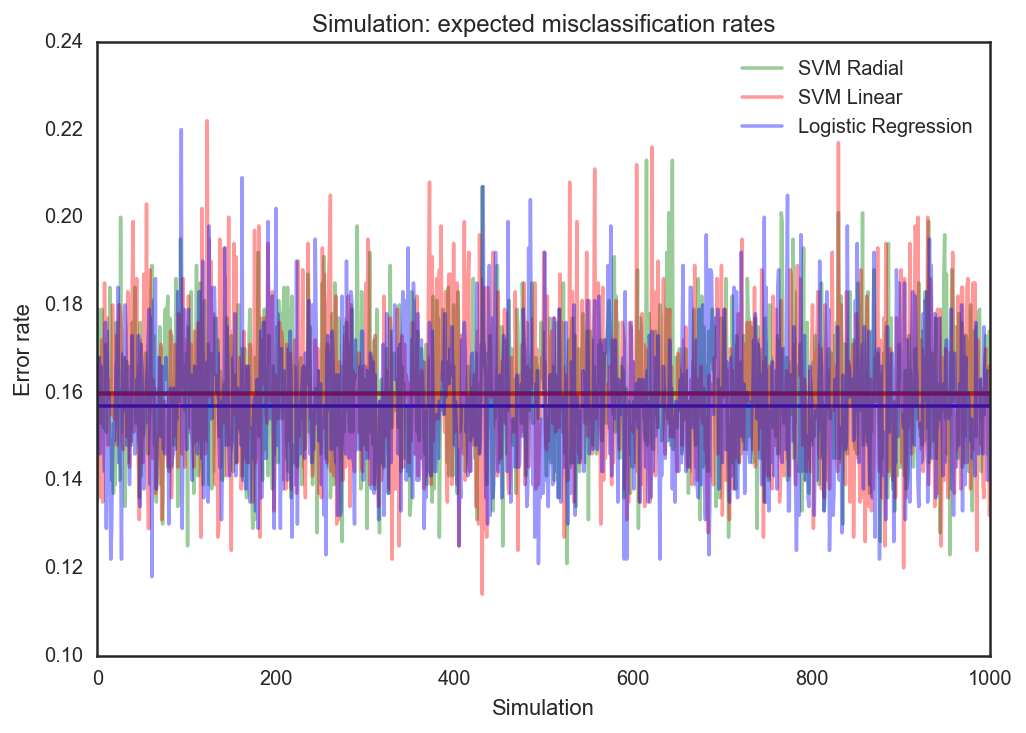

In [6]:
plt.plot(svm_radial, 'g', alpha=0.4, label='SVM Radial')
plt.plot(svm_linear, 'r', alpha=0.4, label='SVM Linear')
plt.plot(log_regr, 'b', alpha=0.4, label='Logistic Regression')
plt.hlines(np.mean(np.c_[svm_radial, svm_linear, log_regr], axis=0), 0, repeats, colors=['g', 'r', 'b'])
plt.xlabel('Simulation')
plt.ylabel('Error rate')
plt.title('Simulation: expected misclassification rates')
plt.legend();